<a href="https://colab.research.google.com/github/aarohisp/GitWorkshop2/blob/main/DS_ML_coding_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing all libraries

In [4]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.9 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from scipy.stats import uniform, randint

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Loading dataset

In [7]:
df = pd.read_csv('/content/drive/MyDrive/DS_ML Coding challenge/DS_ML training dataset.csv')
test = pd.read_csv('/content/drive/MyDrive/DS_ML Coding challenge/DS_ML testing dataset.csv')
df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


#Performing EDA on Data to  
*   Check for Null/missing values
*   Check for Outliers in data
*   Explore Distribution of each feature
*   Explore relationship of each feature with target variable(June 2021 numbers)



In [8]:
df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [9]:
df.info()
print("\n\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB


 ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


No feature has null/missing values in this dataset

There is only 1 numerical column
9sourcing cost, all other columns/features are categorical and will need to be converted.

In [10]:
#Exloring the Statistics of the numerical variables
df.describe()

,Sourcing Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


In [11]:
#dropping target value for better analysis
features = df.drop('Sourcing Cost', axis=1)
features.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20


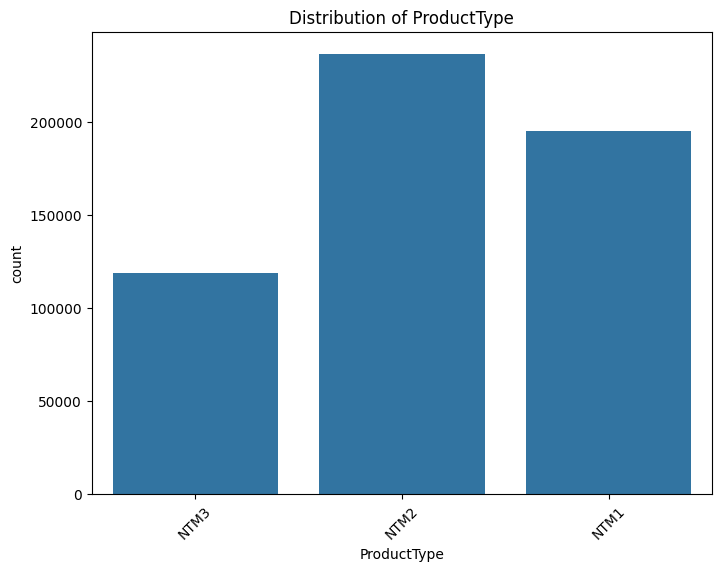

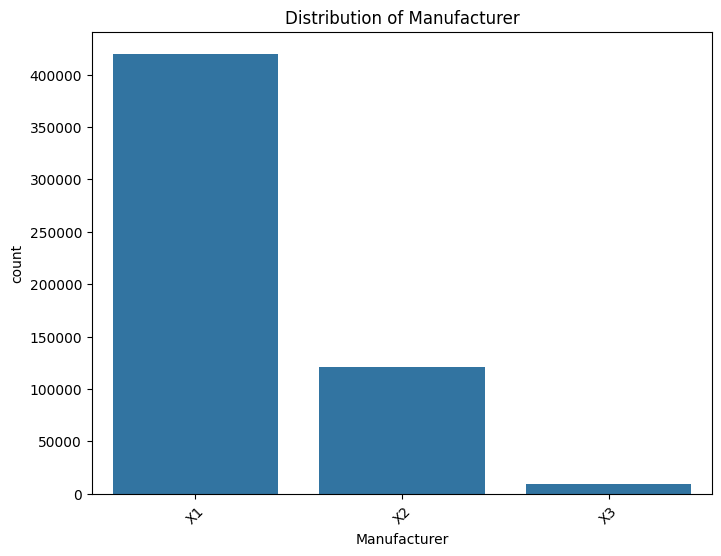

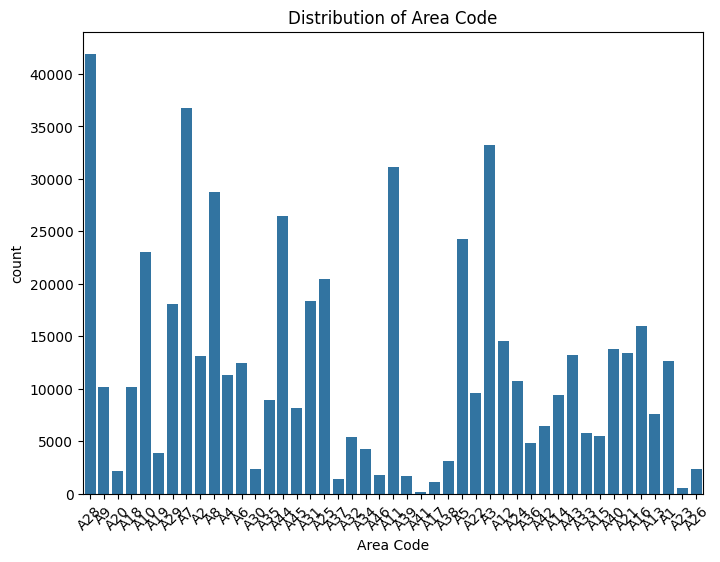

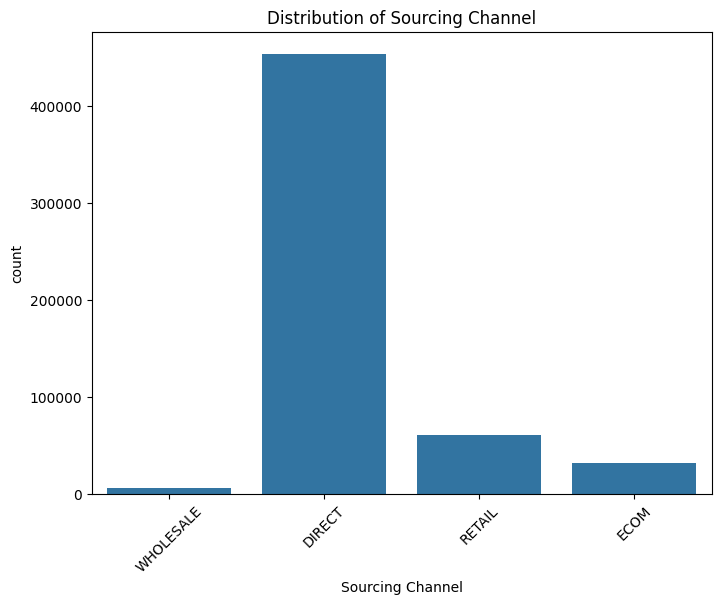

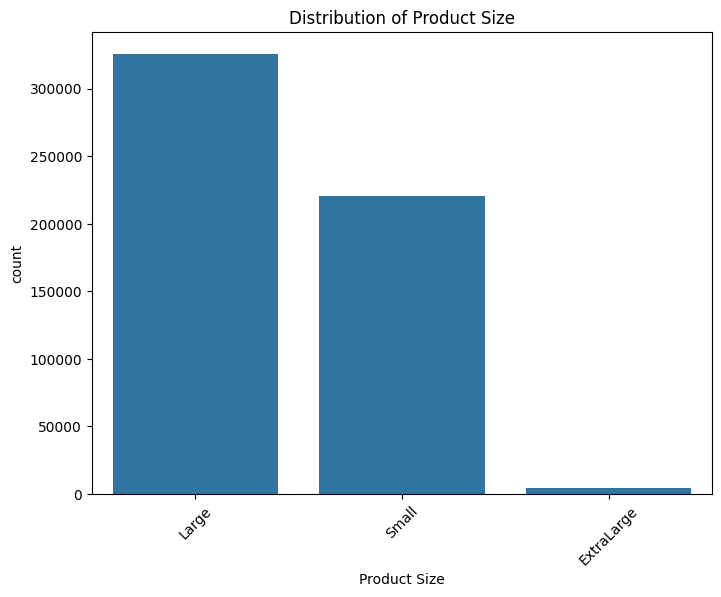

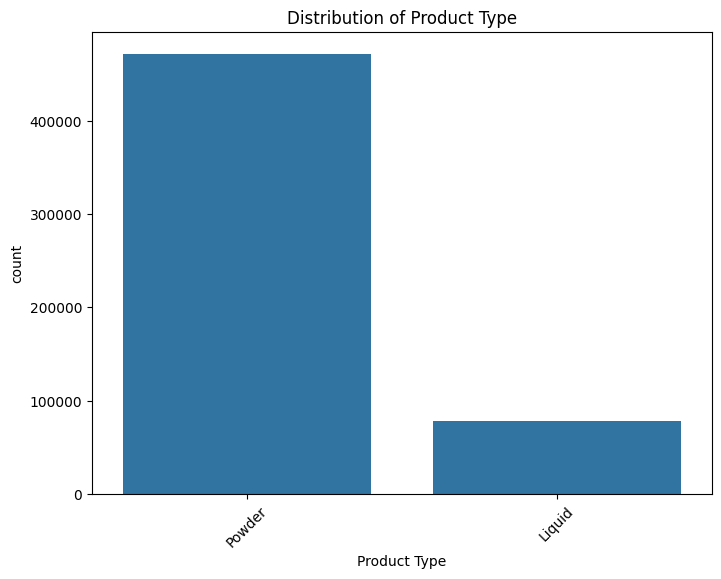

In [ ]:
# Visualizing distributions of categorical variables
categorical_columns = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
#getting count of unique values in each feature
unique_value_counts = features.nunique()
print("\nCount of unique values in each feature:")
print(unique_value_counts)


Count of unique values in each feature:
ProductType           3
Manufacturer          3
Area Code            45
Sourcing Channel      4
Product Size          3
Product Type          2
Month of Sourcing    11
dtype: int64


In the initial dataset, most datasets are categorical in nature with only the target variable i.e sourcing cost being numerical. Hence, dealing with the categorical variables to make it more suitable for analysis.

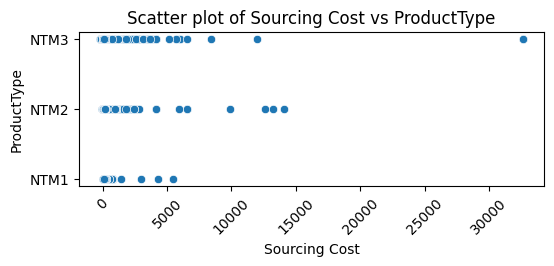

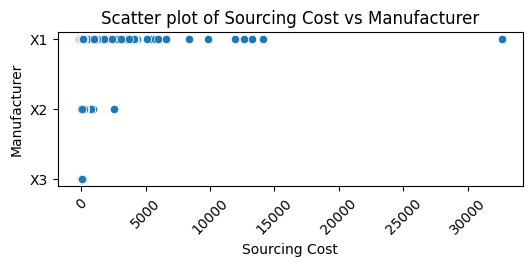

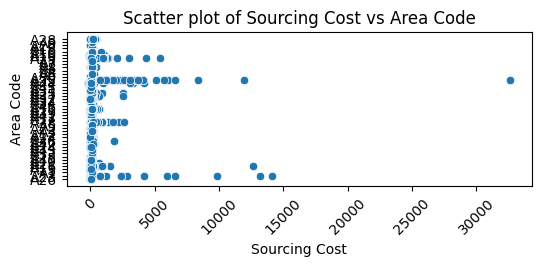

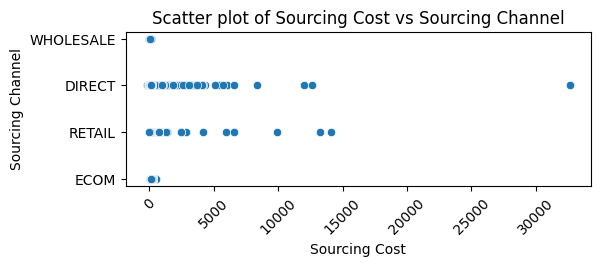

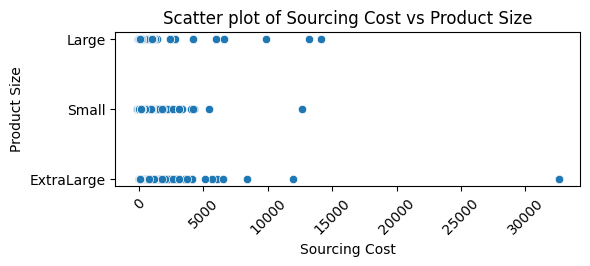

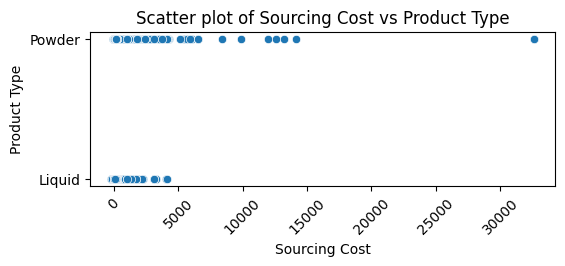

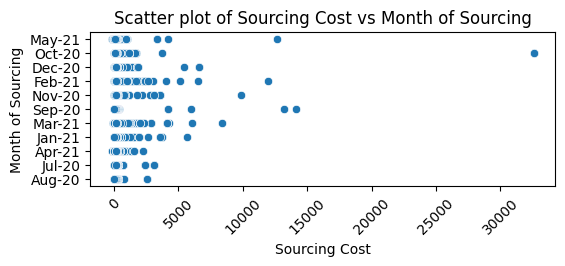

In [ ]:
# Visualizing relationships between features and target variable

# List of features (excluding target feature 'Sourcing Cost')
features = df.columns[df.columns != 'Sourcing Cost']

# Plot scatter plots for each feature against the target variable
for feature in features:
    plt.figure(figsize=(6, 2))
    sns.scatterplot(data=df, x='Sourcing Cost', y=feature)
    plt.title(f'Scatter plot of Sourcing Cost vs {feature}')
    plt.xticks(rotation=45)
    plt.show()

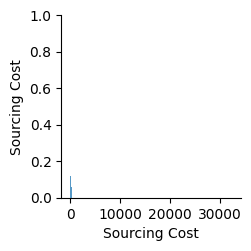

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

#Feature Engineering:

Create new features if necessary.<br>
Encode categorical variables.<br>
Convert the 'Month of Sourcing' into a format that can be used for analysis and modeling (e.g., convert to datetime format).


In [12]:
# Converting 'Month of Sourcing' to datetime format
df['Datetime Month of Sourcing'] = pd.to_datetime(df['Month of Sourcing'], format='%b-%y')
df['Sourcing Month'] = df['Datetime Month of Sourcing'].dt.month
df['Sourcing year'] = df['Datetime Month of Sourcing'].dt.year
df = df.drop('Datetime Month of Sourcing', axis = 1)

test['Datetime Month of Sourcing'] = pd.to_datetime(test['Month of Sourcing'], format='%b-%y')
test['Sourcing Month'] = test['Datetime Month of Sourcing'].dt.month
test['Sourcing year'] = test['Datetime Month of Sourcing'].dt.year

df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Sourcing Month,Sourcing year
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16,5,2021
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28,10,2020
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46,12,2020
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22,2,2021
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76,11,2020


In [13]:
#handling categorical values as most features are unusable from analysis POV

# One-hot encoding all categorical variables except area code as it will increase dimensionality of the dataset
categorical_columns = ['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type']
df_encoded = pd.get_dummies(df, columns=categorical_columns, dtype = 'int')
test_encoded = pd.get_dummies(test, columns=categorical_columns, dtype = 'int')
df_encoded.head()

,Area Code,Month of Sourcing,Sourcing Cost,Sourcing Month,Sourcing year,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder
0,A28,May-21,10.16,5,2021,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1
1,A9,Oct-20,134.28,10,2020,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1
2,A20,Dec-20,12.46,12,2020,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
3,A18,Feb-21,107.22,2,2021,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1
4,A28,Nov-20,197.76,11,2020,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0


Another approach to explore would be to encode the categorical values for feature generation. This would increase dimensionality of the dataset and potentially improve the model's generalisation capability.

In [ ]:
test_encoded.head()

,Area Code,Month of Sourcing,Sourcing Cost,Datetime Month of Sourcing,Sourcing Month,Sourcing year,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,...,Manufacturer_X3,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder
0,A1,Jun-21,103.68,2021-06-01,6,2021,1,0,0,1,...,0,1,0,0,0,0,0,1,0,1
1,A10,Jun-21,155.75,2021-06-01,6,2021,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
2,A10,Jun-21,143.02,2021-06-01,6,2021,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3,A11,Jun-21,139.39,2021-06-01,6,2021,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
4,A2,Jun-21,169.42,2021-06-01,6,2021,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [14]:
#frequency encoding the area code feature to check for relationship between target variable and frequecy of area code visited

area_code_freq = df_encoded['Area Code'].value_counts(normalize=True)
df_encoded['Area Code Frequency'] = df_encoded['Area Code'].map(area_code_freq)
df_encoded.drop('Area Code', axis=1, inplace=True)


area_code_freq = test_encoded['Area Code'].value_counts(normalize=True)
test_encoded['Area Code Frequency'] = test_encoded['Area Code'].map(area_code_freq)
test_encoded.drop('Area Code', axis=1, inplace=True)

# Display the updated DataFrame
df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Sourcing Month,Sourcing year
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16,5,2021
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28,10,2020
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46,12,2020
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22,2,2021
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76,11,2020


Another option to explore would be to cluster the features based on Area code to make more sense out of it and also be more relvant to the target variable

#Data Preprocessing
To handle missing values: Impute or remove them based on the context.
<br>
To handle outliers: Decide whether to remove them, transform them, or treat them specially depending on their impact on the model.

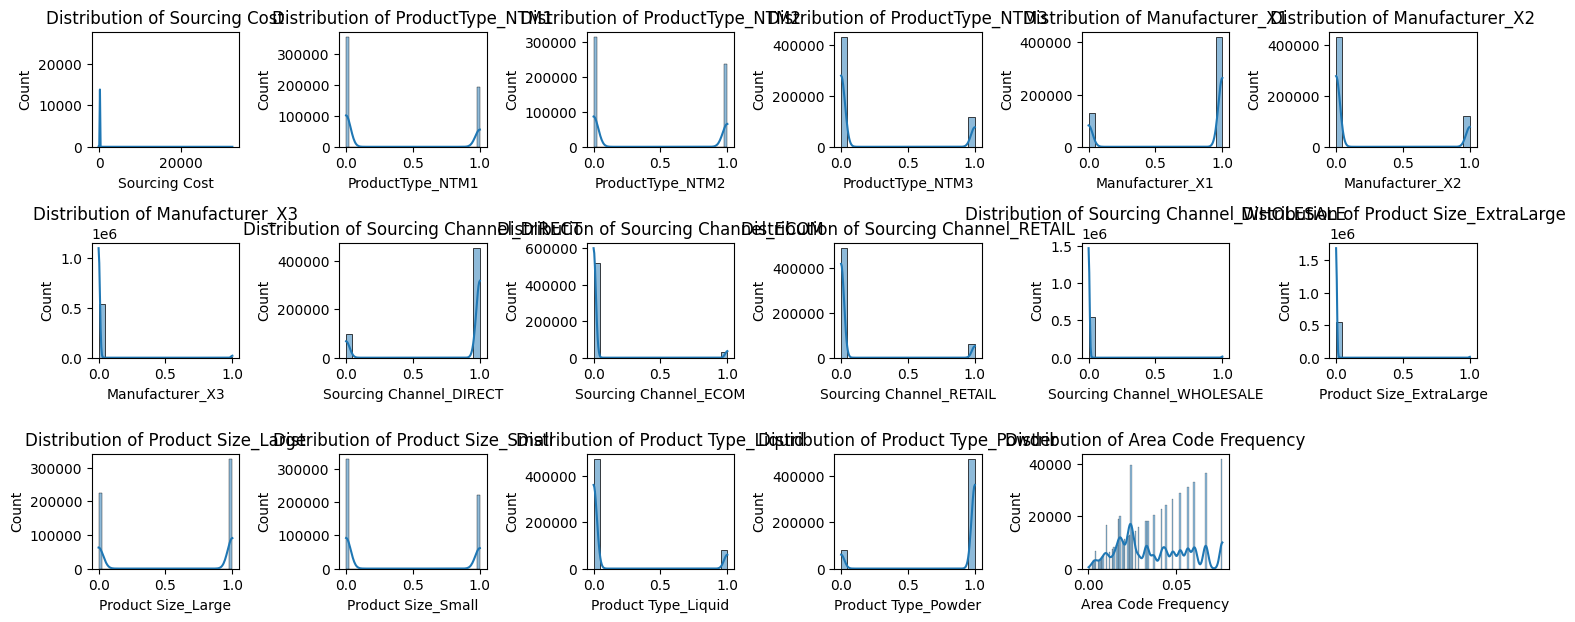

In [ ]:
# Plot histograms for numerical features to visualize distribution
numerical_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 6, i+1)
    sns.histplot(df_encoded[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
# Identify outliers using z-score and IQR
outlier_indices_zscore = []
outlier_indices_iqr = []

for feature in numerical_features:
    # Calculate z-score for each data point
    z_scores = np.abs((df_encoded[feature] - df_encoded[feature].mean()) / df_encoded[feature].std())

    # Define threshold for identifying outliers (e.g., z-score > 3)
    outlier_threshold_zscore = 3
    outlier_indices_zscore.extend(np.where(z_scores > outlier_threshold_zscore)[0])

    # Calculate IQR (Interquartile Range)
    Q1 = df_encoded[feature].quantile(0.25)
    Q3 = df_encoded[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define thresholds for identifying outliers using IQR (e.g., Q1 - 1.5*IQR and Q3 + 1.5*IQR)
    lower_threshold_iqr = Q1 - 1.5 * IQR
    upper_threshold_iqr = Q3 + 1.5 * IQR
    outlier_indices_iqr.extend(np.where((df_encoded[feature] < lower_threshold_iqr) | (df_encoded[feature] > upper_threshold_iqr))[0])

Outliers identified using z-score method:
       Month of Sourcing  Sourcing Cost  Sourcing Month  Sourcing year  \
1098              Dec-20        1033.51              12           2020   
1230              Jan-21         548.62               1           2021   
1267              Jan-21         772.44               1           2021   
1385              Dec-20         891.67              12           2020   
1533              Feb-21         427.94               2           2021   
...                  ...            ...             ...            ...   
549885            Jul-20          57.00               7           2020   
549942            Oct-20        3705.00              10           2020   
550055            Apr-21          57.00               4           2021   
550065            Mar-21          57.00               3           2021   
550088            Dec-20          57.00              12           2020   

        ProductType_NTM1  ProductType_NTM2  ProductType_NTM3  Manufac

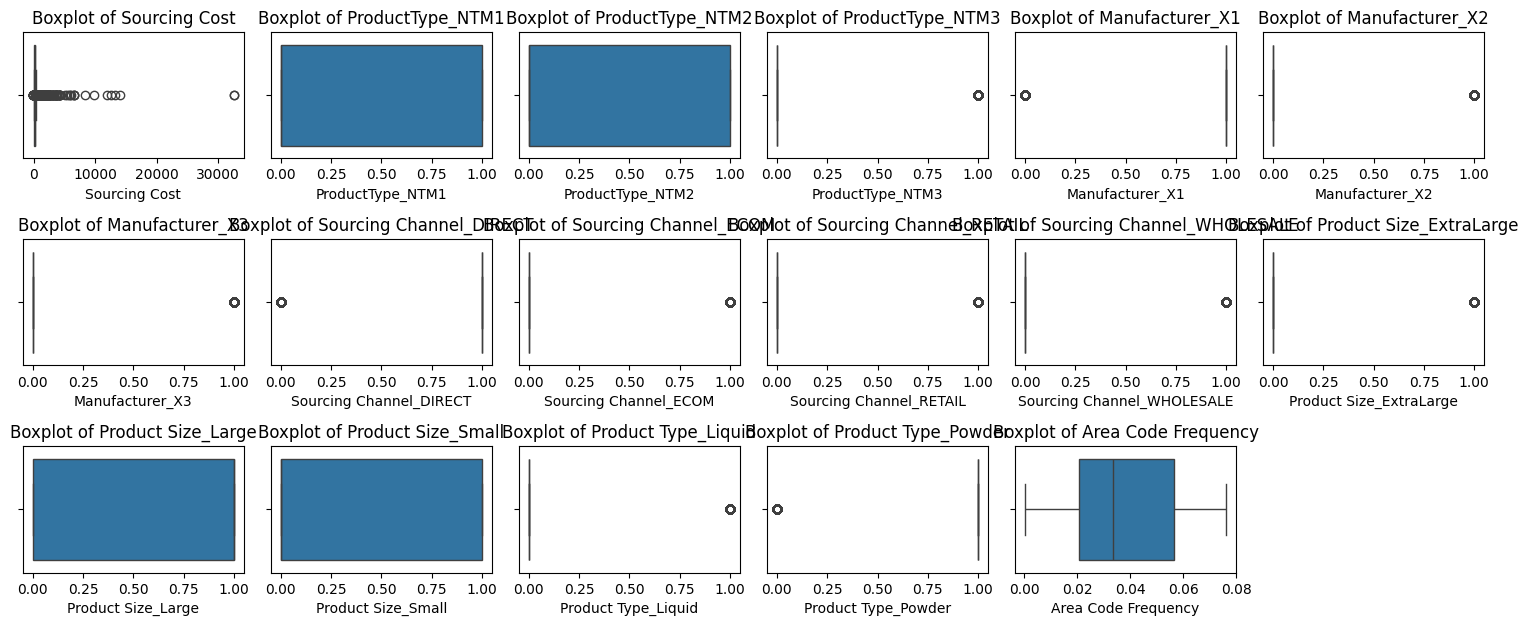

In [ ]:
# Display outliers identified using z-score
print("Outliers identified using z-score method:")
print(df_encoded.iloc[outlier_indices_zscore])

feature_values = df_encoded['Sourcing Cost']
z_scores = np.abs((feature_values - feature_values.mean()) / feature_values.std())

# Define threshold for identifying outliers (e.g., z-score > 3)
outlier_threshold = 3

# Count the number of outliers
num_outliers = np.sum(z_scores > outlier_threshold)

print("Number of outliers:", num_outliers)

print()

# Display outliers identified using IQR
print("\nOutliers identified using IQR method:")
print(df_encoded.iloc[outlier_indices_iqr])

# Plot box plots to visualize outliers
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 6, i+1)
    sns.boxplot(x=df_encoded[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
# Visualize distribution of numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop('Sourcing Cost')

plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 6, i+1)
    sns.histplot(df_encoded[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

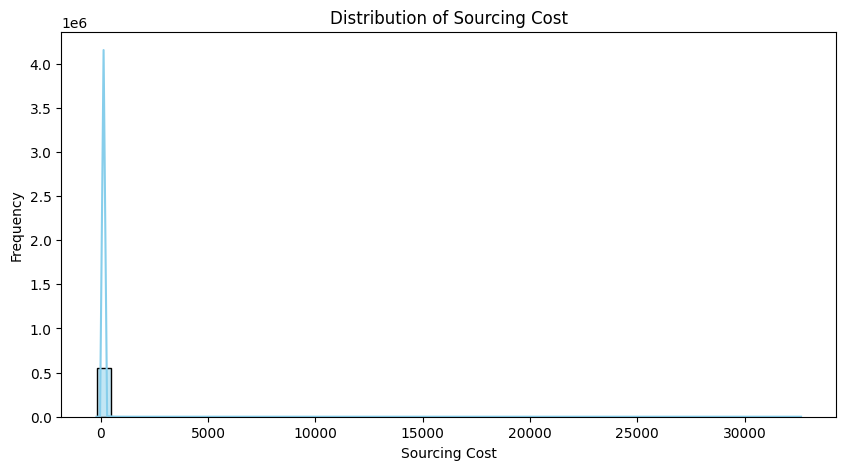

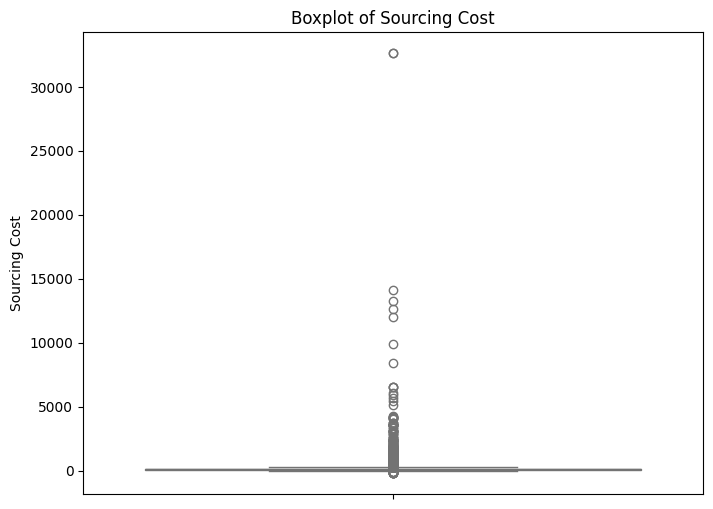

Number of outliers detected using z-score method: 1364
Number of outliers detected using IQR method: 2666


In [ ]:
# Z-score method for outlier detection
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

# IQR method for outlier detection
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    return (data < lower_threshold) | (data > upper_threshold)

# Load your dataset and select the target variable
sourcing_cost = df_encoded['Sourcing Cost']

# Detect outliers using z-score method
outliers_zscore = detect_outliers_zscore(sourcing_cost)

# Detect outliers using IQR method
outliers_iqr = detect_outliers_iqr(sourcing_cost)

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(sourcing_cost, kde=True, color='skyblue', bins=50)
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

# Box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=sourcing_cost, color='lightgreen')
plt.title('Boxplot of Sourcing Cost')
plt.ylabel('Sourcing Cost')
plt.show()

# Print the number of outliers detected by each method
print("Number of outliers detected using z-score method:", outliers_zscore.sum())
print("Number of outliers detected using IQR method:", outliers_iqr.sum())


In [15]:
#there are 4804 records in Sourcing Cost that have Exponentially small values like e^-15. There are also some negative values of Sourcing cost.
#As it seems liek an error in data collection or recording, removing all records where the sourcing ccost is 0 or less than 0

# Filter out records where the sourcing cost is greater than 0
filtered_df = df_encoded[df_encoded['Sourcing Cost'] > 0]
filtered_test = test_encoded[test_encoded['Sourcing Cost'] > 0]
# Display the shape of the filtered DataFrame
print("Shape of filtered DataFrame:", filtered_df.shape)

Shape of filtered DataFrame: (534400, 20)


In [ ]:
# from scipy.stats.mstats import winsorize
# df['Sourcing Cost'] = winsorize(df['Sourcing Cost'], limits=[0.05, 0.05])
# print("Shape of filtered DataFrame:", filtered_df.shape)

In [16]:
#Scaling the target feature having values above 0 as the min value is close to 0 and the highest value is around 32000 and since distribution of values in this range is uniform for each bucket,
#i want to preserve the distribution of and shape of data

scaler = MinMaxScaler()
filtered_df['Sourcing Cost'] = scaler.fit_transform(filtered_df[['Sourcing Cost']])
filtered_test['Sourcing Cost'] = scaler.fit_transform(filtered_test[['Sourcing Cost']])

df.describe()

<ipython-input-16-1a63eae66e12>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Sourcing Cost'] = scaler.fit_transform(filtered_df[['Sourcing Cost']])


,Sourcing Cost,Sourcing Month,Sourcing year
count,550176.000000,550176.000000,550176.000000
mean,108.817286,6.499642,2020.479227
std,104.390093,3.683804,0.499569
min,-196.070000,1.000000,2020.000000
25%,57.000000,3.000000,2020.000000
50%,132.000000,7.000000,2020.000000
75%,146.150000,10.000000,2021.000000
max,32632.500000,12.000000,2021.000000


<ipython-input-21-7fac29c78bbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Datetime Month of Sourcing'] = pd.to_datetime(filtered_df['Month of Sourcing'], format='%b-%y')


Data is sorted chronologically: False
Mean time interval: 0 days 00:00:49.149792570
Standard deviation of time interval: 0 days 03:09:27.059598719


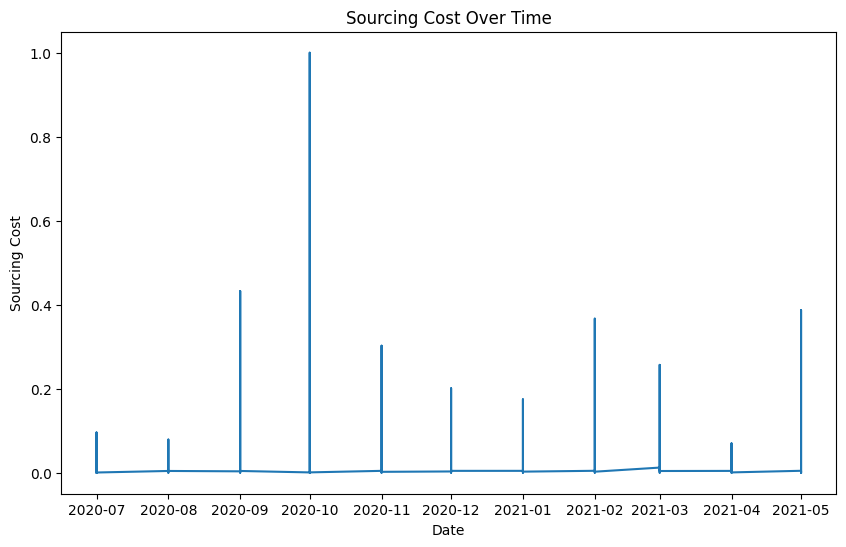

In [21]:
#checking for whether the given data is a time series data

# Convert "Month of Sourcing" column to datetime format
filtered_df['Datetime Month of Sourcing'] = pd.to_datetime(filtered_df['Month of Sourcing'], format='%b-%y')
filtered_test['Datetime Month of Sourcing'] = pd.to_datetime(filtered_test['Month of Sourcing'], format='%b-%y')
# Sort the dataframe based on the time-related column
df_sorted = filtered_df.sort_values(by='Datetime Month of Sourcing')

# Check if the observations are arranged chronologically
is_sorted = df_sorted['Datetime Month of Sourcing'].equals(df_sorted['Datetime Month of Sourcing'].sort_values())
print("Data is sorted chronologically:", is_sorted)

# Calculate time intervals between consecutive observations
time_intervals = df_sorted['Datetime Month of Sourcing'].diff().dropna()
mean_time_interval = time_intervals.mean()
std_time_interval = time_intervals.std()
print("Mean time interval:", mean_time_interval)
print("Standard deviation of time interval:", std_time_interval)

# Visualize the data over time
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Datetime Month of Sourcing'], df_sorted['Sourcing Cost'])
plt.title('Sourcing Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Sourcing Cost')
plt.show()

Since the data is not sorted chronologically, inferring that the data is not a time series data and is more suited for regression analysis.

#Model Selection:

For this case, choosing to go with Gradient Boosting Regression, Random Forest and Decision Tree as the given dataset contains both numerical and categorical featuresand could benefit using ensemble methods like Random Forest Regression or Gradient Boosting Regression

#Model Training and Evaluation:

Training the selected models on the training data.<br>
Evaluating the models using MSE, RMSE, MAE on the test set.<br>
Comparing the performance of different models.


In [17]:
df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Sourcing Month,Sourcing year
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16,5,2021
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28,10,2020
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46,12,2020
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22,2,2021
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76,11,2020


In [18]:
df_encoded.head()

,Month of Sourcing,Sourcing Cost,Sourcing Month,Sourcing year,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder,Area Code Frequency
0,May-21,10.16,5,2021,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0.076203
1,Oct-20,134.28,10,2020,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0.018370
2,Dec-20,12.46,12,2020,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0.003864
3,Feb-21,107.22,2,2021,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0.018456
4,Nov-20,197.76,11,2020,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0.076203


In [19]:
filtered_df.head()

,Month of Sourcing,Sourcing Cost,Sourcing Month,Sourcing year,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder,Area Code Frequency
0,May-21,0.000311,5,2021,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0.076203
1,Oct-20,0.004115,10,2020,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0.018370
2,Dec-20,0.000382,12,2020,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0.003864
3,Feb-21,0.003285,2,2021,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0.018456
4,Nov-20,0.006060,11,2020,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0.076203


In [22]:
#train-test splitting
X_train = filtered_df.drop(['Sourcing Cost', 'Month of Sourcing', 'Sourcing year', 'Datetime Month of Sourcing'], axis=1)
y_train = filtered_df['Sourcing Cost']
X_test = filtered_test.drop(['Sourcing Cost', 'Month of Sourcing', 'Sourcing year', 'Datetime Month of Sourcing'], axis=1)
y_test = filtered_test['Sourcing Cost']

In [ ]:
# decision tree regression
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

feature_importances = dt_regressor.feature_importances_

for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

train_score = dt_regressor.score(X_train, y_train)
test_score = dt_regressor.score(X_test, y_test)
dt_predictions = dt_regressor.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_predictions, squared=True)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)

print("\n\nTrain Score:", train_score)
print("Test Score:", test_score)

# Performing cross-validation
cv_scores = cross_val_score(dt_regressor, X_train, y_train, cv=5)

print("\n\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Sourcing Month: 0.21555489463958433
ProductType_NTM1: 0.012654219575407338
ProductType_NTM2: 0.020374661736669495
ProductType_NTM3: 0.13582828042417627
Manufacturer_X1: 0.1552411797386483
Manufacturer_X2: 0.0
Manufacturer_X3: 0.0
Sourcing Channel_DIRECT: 0.0029296789292378267
Sourcing Channel_ECOM: 0.0050105202626302605
Sourcing Channel_RETAIL: 0.006087728138980689
Sourcing Channel_WHOLESALE: 0.0011014049697127143
Product Size_ExtraLarge: 0.0
Product Size_Large: 0.06152785194913377
Product Size_Small: 0.02441366818747365
Product Type_Liquid: 0.00346042962326239
Product Type_Powder: 0.0011282847023311577
Area Code Frequency: 0.3546871971227518


Train Score: 0.32345289109407394
Test Score: -3.7741186104729803


Cross-Validation Scores: [0.43805633 0.19517743 0.3326692  0.14770571 0.35541849]
Mean CV Score: 0.2938054310050151


Though Decision Tree's ability to show feature importance and rank them, we can wee that the top features having the most impact on the target cariable is Sourcing month and area code frequency

In [ ]:
#Random Forest regressor model
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)

# Calculating performance metrics
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

In [ ]:
print("Random Forest Regression MSE:", rf_mse)
print("Random Forest Regression MAE:", rf_mae)
print("Random Forest Regression RMSE:", rf_rmse)

Random Forest Regression MSE: 0.24361873834255973
Random Forest Regression MAE: 0.43905991413485435
Random Forest Regression RMSE: 0.49357748970405824


Random Forest Regression MSE: 0.24361873834255973
Random Forest Regression MAE: 0.43905991413485435
Random Forest Regression RMSE: 0.49357748970405824


In [ ]:
#Gradient Boosting regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
gb_predictions = gb_regressor.predict(X_test)

# Calculating performance metrics
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)

In [ ]:
print("Gradient Boosting Regression MSE:", gb_mse)
print("Gradient Boosting Regression MAE:", gb_mae)
print("Gradient Boosting Regression RMSE:", gb_rmse)

In [ ]:
#XGBoost Regressor

xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)
xgb_predictions = xgb_regressor.predict(X_test)

xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)

# LightGBM
lgb_regressor = lgb.LGBMRegressor()
lgb_regressor.fit(X_train, y_train)
lgb_predictions = lgb_regressor.predict(X_test)

lgb_mse = mean_squared_error(y_test, lgb_predictions)
lgb_mae = mean_absolute_error(y_test, lgb_predictions)
lgb_rmse = mean_squared_error(y_test, lgb_predictions, squared=False)

# CatBoost
catboost_regressor = CatBoostRegressor()
catboost_regressor.fit(X_train, y_train, verbose=0)
catboost_predictions = catboost_regressor.predict(X_test)

catboost_mse = mean_squared_error(y_test, catboost_predictions)
catboost_mae = mean_absolute_error(y_test, catboost_predictions)
catboost_rmse = mean_squared_error(y_test, catboost_predictions, squared=False)

In [ ]:
print("XGBoost")
print("MSE:", xgb_mse)
print("MAE:", xgb_mae)
print("RMSE:", xgb_rmse)
print()
print("LightGBM")
print("MSE:", lgb_mse)
print("MAE:", lgb_mae)
print("RMSE:", lgb_rmse)
print()
print("CatBoost")
print("MSE:", catboost_mse)
print("MAE:", catboost_mae)
print("RMSE:", catboost_rmse)

#Hyperparameter Tuning:

Tuning hyperparameters of the selected models(Decision Tree, Random Forest and Graident boosting regressor) to improve performance.


In [ ]:
# Decion Tree regressor with regularization
dt_regressor_regularized = DecisionTreeRegressor(max_depth=5)

dt_regressor_regularized.fit(X_train, y_train)

train_score = dt_regressor_regularized.score(X_train, y_train)
test_score = dt_regressor_regularized.score(X_test, y_test)
dt_regressor_regularized_predictions = dt_regressor_regularized.predict(X_test)

dt_regressor_mse = mean_squared_error(y_test, dt_regressor_regularized_predictions, squared=True)
dt_regressor_mae = mean_absolute_error(y_test, dt_regressor_regularized_predictions)
dt_regressor_rmse = mean_squared_error(y_test, dt_regressor_regularized_predictions, squared=False)

# Printing model performance
print("Train Score (Regularized):", train_score)
print("Test Score (Regularized):", test_score)

Train Score (Regularized): 0.18781157289131645
Test Score (Regularized): -3.7704588245687916


In [ ]:
# trying to optimize DT model with lasso regularization

lasso_pipeline = make_pipeline(StandardScaler(), Lasso(alpha=0.1))
lasso_pipeline.fit(X_train, y_train)

train_score = lasso_pipeline.score(X_train, y_train)
test_score = lasso_pipeline.score(X_test, y_test)
lasso_predictions = lasso_pipeline.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_predictions, squared=True)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)

# Print model performance
print("Train Score (Lasso Regularized):", train_score)
print("Test Score (Lasso Regularized):", test_score)

Train Score (Lasso Regularized): 0.0
Test Score (Lasso Regularized): -3.780714730326425


In [ ]:
print("Decision Tree Regression MSE:", dt_mse)
print("Decision Tree Regression MAE:", dt_mae)
print("Decision Tree Regression RMSE:", dt_rmse)
print()
print("Decision Tree Regression Regularized MSE:", dt_regressor_mse)
print("Decision Tree Regression Regularized MAE:", dt_regressor_mae)
print("Decision Tree Regression Regularized RMSE:", dt_regressor_rmse)
print()
print("Lasso Regularized MSE:", lasso_mse)
print("Lasso Regularized MAE:", lasso_mae)
print("Lasso Regularized RMSE:", lasso_rmse)

Decision Tree Regression MSE: 0.243629958047337
Decision Tree Regression MAE: 0.43903659308090454
Decision Tree Regression RMSE: 0.49358885527059565

Decision Tree Regression Regularized MSE: 0.24344319404772805
Decision Tree Regression Regularized MAE: 0.4387947867328445
Decision Tree Regression Regularized RMSE: 0.4933996291524022

Lasso Regularized MSE: 0.24396656728022129
Lasso Regularized MAE: 0.43931538060586056
Lasso Regularized RMSE: 0.4939297189684189


Regularization of any sort is actually downgrading the performace of decision tree due to mismatch between data's nature and model's complexity

In [ ]:
#Hyperparameter tuning the RF model to improve performance
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_regressor = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rf_regressor, param_distributions=param_grid, n_iter=25, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best model
best_rf_model = random_search.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}


In [ ]:
# Cross-Validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print("\nCross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE Score:", cv_rmse_scores.mean())

rf_predictions = best_rf_model.predict(X_test)


Cross-Validation RMSE Scores: [0.00154764 0.00333932 0.00171166 0.00341282 0.00306123]
Mean RMSE Score: 0.002614532354352355


Good improvement of Random forest after finding best combination of parameters and using cross-validation over 5 folds

In [25]:
#using the best parameters
best_params = {
    'n_estimators': 100,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'max_features': 'log2',
    'max_depth': None
}

best_rf_model = RandomForestRegressor(random_state=42, **best_params)

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print("\nCross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE Score:", cv_rmse_scores.mean())

rf_predictions = best_rf_model.predict(X_test)


Cross-Validation RMSE Scores: [0.00154764 0.00333932 0.00171166 0.00341282 0.00306123]
Mean RMSE Score: 0.002614532354352355


In [31]:
rf1_mse = mean_squared_error(y_test, rf_predictions)
rf1_mae = mean_absolute_error(y_test, rf_predictions)
rf1_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

print("Random Forest Regression MSE:", rf1_mse)
print("Random Forest Regression MAE:", rf1_mae)
print("Random Forest Regression RMSE:", rf1_rmse)

Random Forest Regression MSE: 4.764e-05
Random Forest Regression MAE: 0.00011735
Random Forest Regression RMSE: 0.00661735


In [ ]:
# to improve performance of gradient boosting regressor model
param_grid = {
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

gb_regressor = GradientBoostingRegressor()

# Perform Randomized Search Cross Validation
random_search = RandomizedSearchCV(gb_regressor, param_distributions=param_grid, n_iter=25, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


#Final Model Selection:

The best model based on its ability to minimize prediction errors, as indicated by lower RMSE scores and consistent performance across cross-validation folds is <br>
Random forest regressor with {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None} combination of hyperparameters